In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=48f60651e46d8d5dad131a0eacc82603


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Country": city_country,
                          "Date": city_date,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kamenka
Processing Record 2 of Set 1 | dikson
Processing Record 3 of Set 1 | asyut
Processing Record 4 of Set 1 | srednekolymsk
Processing Record 5 of Set 1 | saint-joseph
Processing Record 6 of Set 1 | amderma
City not found. Skipping...
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | bowen
Processing Record 10 of Set 1 | black river
Processing Record 11 of Set 1 | port hedland
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | torbay
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | prince rupert
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1

Processing Record 33 of Set 4 | kharp
Processing Record 34 of Set 4 | macau
Processing Record 35 of Set 4 | champerico
Processing Record 36 of Set 4 | bolungarvik
City not found. Skipping...
Processing Record 37 of Set 4 | padang
Processing Record 38 of Set 4 | mhlambanyatsi
Processing Record 39 of Set 4 | butaritari
Processing Record 40 of Set 4 | nabire
Processing Record 41 of Set 4 | xuddur
Processing Record 42 of Set 4 | bambous virieux
Processing Record 43 of Set 4 | port elizabeth
Processing Record 44 of Set 4 | bandarbeyla
Processing Record 45 of Set 4 | broome
Processing Record 46 of Set 4 | uaua
Processing Record 47 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 48 of Set 4 | mehamn
Processing Record 49 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 50 of Set 4 | synya
Processing Record 1 of Set 5 | zhigansk
Processing Record 2 of Set 5 | nuuk
Processing Record 3 of Set 5 | karamea
City not found. Skipping...
Processing Record 4 of Se

Processing Record 24 of Set 8 | mantua
Processing Record 25 of Set 8 | wattegama
Processing Record 26 of Set 8 | daguma
Processing Record 27 of Set 8 | kurchum
Processing Record 28 of Set 8 | samarai
Processing Record 29 of Set 8 | zhezkazgan
Processing Record 30 of Set 8 | oriximina
Processing Record 31 of Set 8 | kutum
Processing Record 32 of Set 8 | durban
Processing Record 33 of Set 8 | tirlyanskiy
Processing Record 34 of Set 8 | ondjiva
Processing Record 35 of Set 8 | iralaya
Processing Record 36 of Set 8 | sudak
Processing Record 37 of Set 8 | warren
Processing Record 38 of Set 8 | ekibastuz
Processing Record 39 of Set 8 | atikokan
Processing Record 40 of Set 8 | bac lieu
Processing Record 41 of Set 8 | san patricio
Processing Record 42 of Set 8 | hasaki
Processing Record 43 of Set 8 | ballina
Processing Record 44 of Set 8 | port-gentil
Processing Record 45 of Set 8 | acapulco
Processing Record 46 of Set 8 | sambava
Processing Record 47 of Set 8 | waipawa
Processing Record 48 of 

Processing Record 13 of Set 12 | kantemirovka
Processing Record 14 of Set 12 | ust-tsilma
Processing Record 15 of Set 12 | gizo
Processing Record 16 of Set 12 | belaya gora
Processing Record 17 of Set 12 | mocajuba
Processing Record 18 of Set 12 | ottawa
Processing Record 19 of Set 12 | bria
Processing Record 20 of Set 12 | angoche
Processing Record 21 of Set 12 | hay river
Processing Record 22 of Set 12 | kloulklubed
Processing Record 23 of Set 12 | tevriz
Processing Record 24 of Set 12 | darnah
Processing Record 25 of Set 12 | prince albert
Processing Record 26 of Set 12 | neiafu
Processing Record 27 of Set 12 | bethel
Processing Record 28 of Set 12 | oparino
Processing Record 29 of Set 12 | yuanping
Processing Record 30 of Set 12 | cifuentes
Processing Record 31 of Set 12 | lancaster
Processing Record 32 of Set 12 | abu dhabi
Processing Record 33 of Set 12 | sironj
Processing Record 34 of Set 12 | esperance
Processing Record 35 of Set 12 | noumea
Processing Record 36 of Set 12 | kil

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kamenka,RU,2021-09-17 10:36:49,51.3223,42.7678,62.44,36,78,6.73
1,Dikson,RU,2021-09-17 10:36:49,73.5069,80.5464,34.25,71,100,18.32
2,Asyut,EG,2021-09-17 10:36:50,27.1810,31.1837,84.38,25,0,17.92
3,Srednekolymsk,RU,2021-09-17 10:36:50,67.4500,153.6833,47.30,66,91,4.92
4,Saint-Joseph,RE,2021-09-17 10:36:50,-21.3667,55.6167,77.36,72,15,5.06
5,Punta Arenas,CL,2021-09-17 10:36:51,-53.1500,-70.9167,35.71,93,90,6.91
6,Busselton,AU,2021-09-17 10:36:51,-33.6500,115.3333,53.08,67,64,7.72
7,Bowen,AU,2021-09-17 10:36:52,-20.0167,148.2333,66.42,70,3,16.20
8,Black River,JM,2021-09-17 10:36:52,18.0264,-77.8487,74.98,83,37,3.71
9,Port Hedland,AU,2021-09-17 10:36:52,-20.3167,118.5667,80.65,36,24,12.66


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

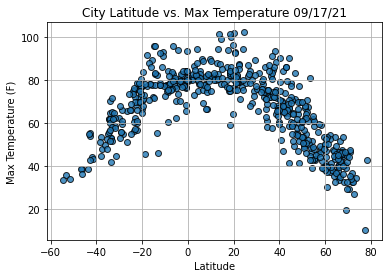

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

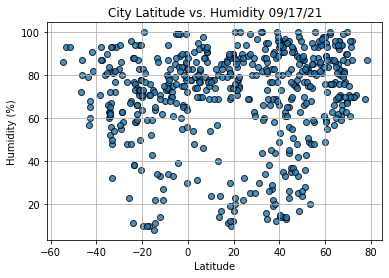

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

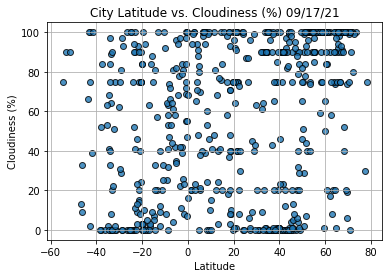

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

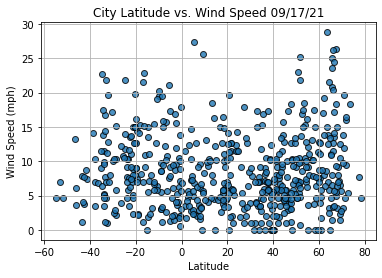

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [26]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [28]:
index13 = city_data_df.loc[13]

In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

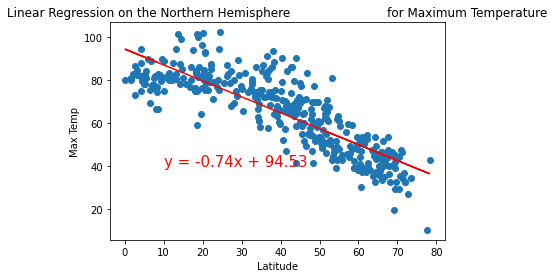

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

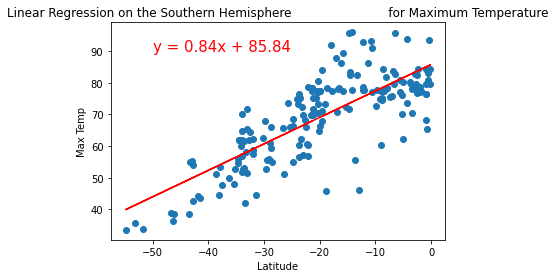

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

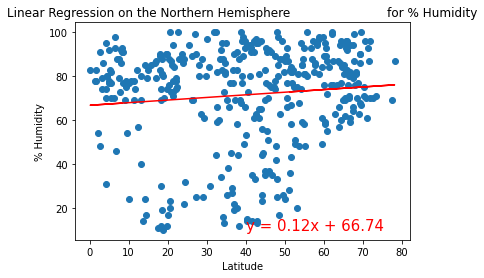

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

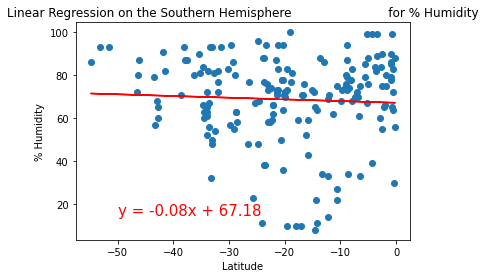

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

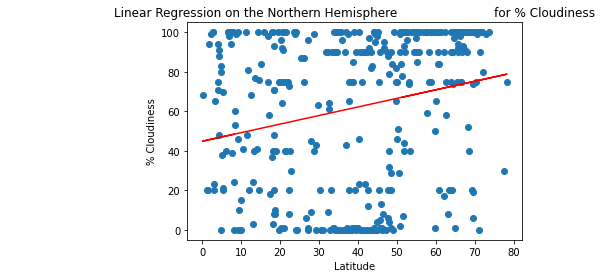

In [40]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

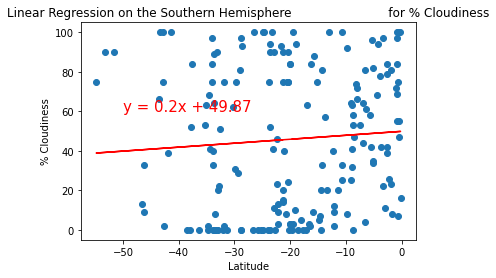

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

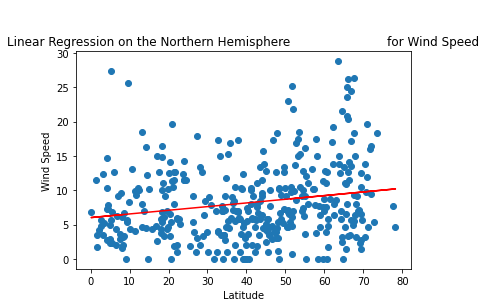

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

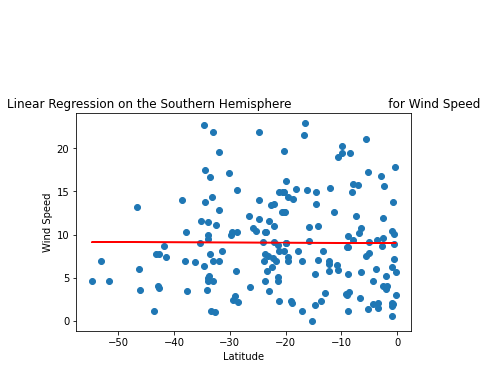

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))